In [1]:
import numpy as np


In [2]:
def sum_square(y, t):
    return 0.5 * np.sum((y-t)**2)

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

print(sum_square(np.array(y1), np.array(t)))
print(sum_square(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


In [6]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [10]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)   
### 0~train_size-1 까지의 숫자 중 batch_size의 개수만큼 추출

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    ### one_hot vector case
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [13]:
t = [[0, 1, 0], [0, 0, 1]]
y = [[1, 2, 3], [3, 4, 5]]
cross = t*np.log(y)
print(cross)

[[0.         0.69314718 0.        ]
 [0.         0.         1.60943791]]


In [14]:
#### DIFFERENTIAL FUNCITON###
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x))/h

In [15]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

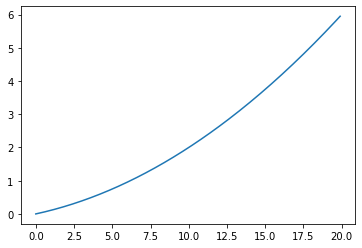

In [16]:
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.plot(x, y)
plt.show()

In [17]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))


0.20000099999917254
0.3000009999976072


In [19]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [18]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    ## x -> array(1, 2)
    ## idx -> diff parameter
    for idx in range(x.size):
        tmp_val = x[idx]
        ## f(x+h)
        x[idx] = tmp_val + h
        fx1 = function_2(x)
        ## f(x-h)
        x[idx] = tmp_val - h
        fx2 = function_2(x)
        
        grad[idx] = (fx1 - fx2) / (2*h)
        x[idx] = tmp_val
    
    return grad
        

In [20]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))

[6. 8.]


In [25]:
### init_x - input
### lr - learning rate
### step_num - repeatation number of gradient descent

def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        # print("GRADIENT ",grad[0], ", ", grad[1])
        x = x - lr*grad
    return x
    

In [27]:
x = np.array([3.0, 4.0])
x1 = np.array([-3.0, 4.0])
result_x = gradient_descent(function_2, init_x = x, lr = 0.1, step_num=100)
print(gradient_descent(function_2, x1, 10, 100))
print(result_x)

[-2.58983747e+13 -1.29524862e+12]
[6.11110793e-10 8.14814391e-10]


In [28]:
#### SIMPLE NET IMPLEMENT ####

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = self.soft_max(z)
        loss = self.cross_entropy_error(y, t)
        return loss
    
    ### TOOLS ###
    def soft_max(a):
        max = np.max(a)
        exp_a = np.exp(a - max)
        sum_exp_a = np.sum(exp_a)
        y = exp_a / sum_exp_a
        return y
    
    def cross_entropy_error(y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)

        batch_size = y.shape[0]
        ### one_hot vector case
        return -np.sum(t * np.log(y + 1e-7)) / batch_size
    


In [30]:
net = simpleNet()
print(net.W)

[[ 1.02387462 -0.07259737 -1.32926361]
 [-0.42173639  0.11251534  1.58792628]]


In [34]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))

[0.23476202 0.05770539 0.63157548]
2


In [8]:
import numpy as np
x = np.array([[1,2,3], [2,3,4], [3, 2, 1]])
x = np.argmax(x, axis = 0)
print(x)

[2 1 1]


In [1]:
from two_layer_net import *

x, t = get_train_data()
print(x.shape)
print(t.shape)
print(t[0])

(60000, 784)
(60000,)
5


In [11]:
import numpy as np
from two_layer_net import TwoLayerNet
from common import *
import matplotlib.pyplot

network = TwoLayerNet(input_size=784, hidden_size=50,
                      output_size=10, weight_init_std=0.01)

train_loss_list = []

x_train, t_train = get_train_data()
iters_num = 1
train_size = x_train.shape[0]
batch_size = 10
learning_rate = 0.1



## MINI BATCHs
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

y = network.predict(x_batch)

y = np.argmax(y, axis = 1)

print(y.shape)


(10,)
